# Loan dataset
## URL：https://www.kaggle.com/datasets/itsmesunil/bank-loan-modelling/data
### ***Introduction***
This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns to better target marketing to increase the success ratio with a minimal budget.        
### ***Our work***   
We download the Loan dataset from the Kaggle dataset website and process it. Examples include removing duplicate features, etc., to ensure a relatively clean census dataset. It is used to predict the likelihood of a liability customer buying personal loans, to assist the generation of financial data and solve the problem of privacy protection.      
### ***Target:***  
+ **Personal Loan**：0, 1, Did this customer accept the personal loan offered in the last campaign?.  
### ***Features:***      
+ **Age**: continuous, customer's age in completed years.   
+ **Experience**: continuous, years of professional experience.   
+ **Income**: continuous, annual income of the customer.    
+ **ZIPCode**: continuous, Home Address ZIP code.   
+ **Family**: 1, 2, 3, 4, Family size of the customer.   
+ **CCAvg**: continuous, Avg. spending on credit cards per month, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.   
+ **Education**: 1, 2, 3, Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional.  
+ **Mortgage**: continuous, value of house mortgage if any.   
+ **CreditCard**: 0, 1, Does the customer use a credit card issued by UniversalBank?.   
+ **Securities Account**: 0, 1, Does the customer have a securities account with the bank?  
+ **CD Account**: 0, 1, Does the customer have a certificate of deposit (CD) account with the bank?.   
+ **Online**: 0, 1, Does the customer use internet banking facilities?.   						
### ***Reference:***
[1] Sunil Jacob (2024). Bank_Loan_modelling [Dataset]. Kaggle Repository. Available: https://www.kaggle.com/datasets/itsmesunil/bank-loan-modelling/data

***Time ： 2024/11/25 01:38***  
***Author ： Chuang Liu***  
***Email ：LIUC0316@126.COM***  
***File ：Loan_Processing.ipynb***  
***Notebook ：Jupyter***   

In [1]:
# only for Python 3.10+
# import mlcroissant as mlc
import pandas as pd
#
# # Fetch the Croissant JSON-LD
# croissant_dataset = mlc.Dataset('www.kaggle.com/datasets/itsmesunil/bank-loan-modelling/croissant/download')
#
# # Check what record sets are in the dataset
# record_sets = croissant_dataset.metadata.record_sets
# print(record_sets)
#
# # Fetch the records and put them in a DataFrame
# record_set_df = pd.DataFrame(croissant_dataset.records(record_set=record_sets[0].uuid))
# record_set_df.head()

In [2]:
# input kaggle datasets download itsmesunil/bank-loan-modelling to the terminal to get .xlsx
df = pd.read_excel("../Bank_Personal_Loan_Modelling.xlsx", sheet_name='Data')
df.drop(['ID'], axis=1, inplace=True)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [3]:
# make label Personal Loan be the last column
col_a = df.columns.get_loc("Personal Loan")
col_b = df.columns.get_loc("CreditCard")
df_copy = df.copy()
list_cols = df_copy.columns.tolist()
list_cols[col_a], list_cols[col_b] = list_cols[col_b], list_cols[col_a]
df = df_copy.reindex(columns=list_cols)
df.head()
df.info()
df.to_csv("Loan.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   CreditCard          5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  Personal Loan       5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [4]:
df.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,CreditCard,Securities Account,CD Account,Online,Personal Loan
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.294000,0.104400,0.06040,0.596800,0.096000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.455637,0.305809,0.23825,0.490589,0.294621
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,1.000000,0.000000,0.00000,1.000000,0.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


Column: Age, Normality Test p-value: 0.0
Age do not follow Gaussian distribution


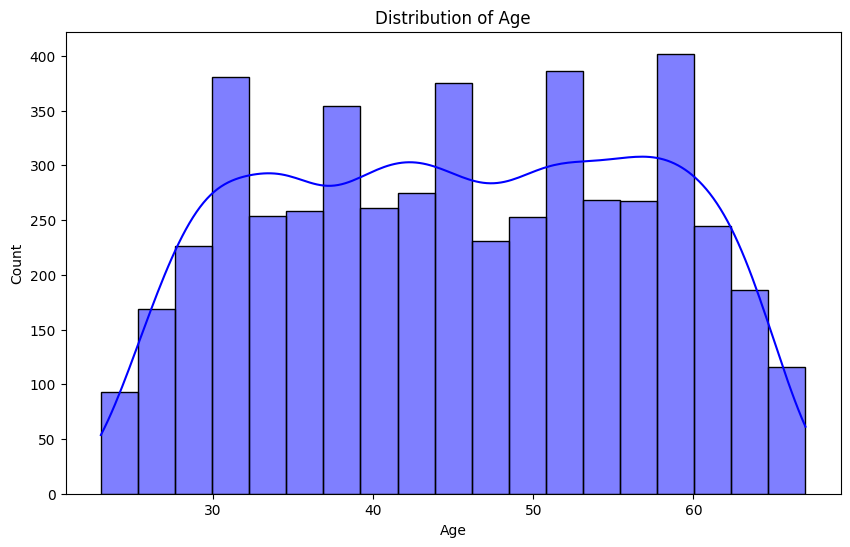

Column: Experience, Normality Test p-value: 0.0
Experience do not follow Gaussian distribution


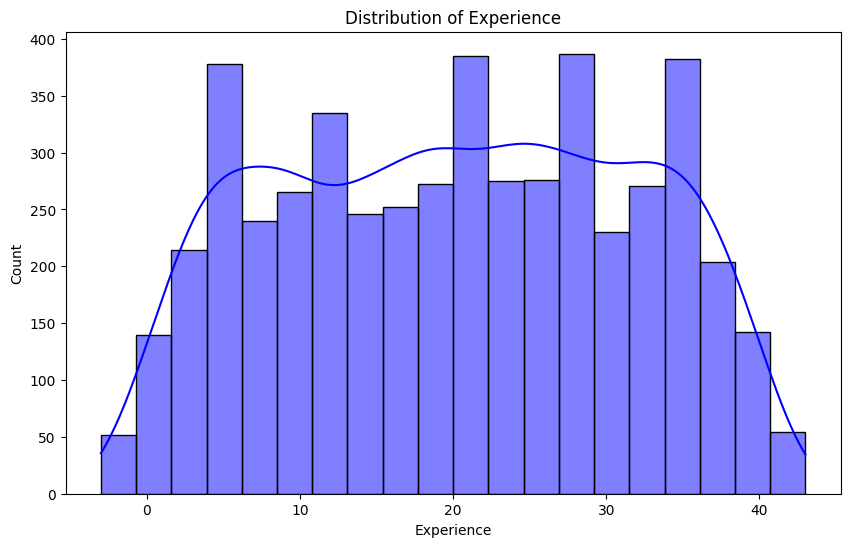

Column: Income, Normality Test p-value: 1.8619450280736124e-99
Income do not follow Gaussian distribution


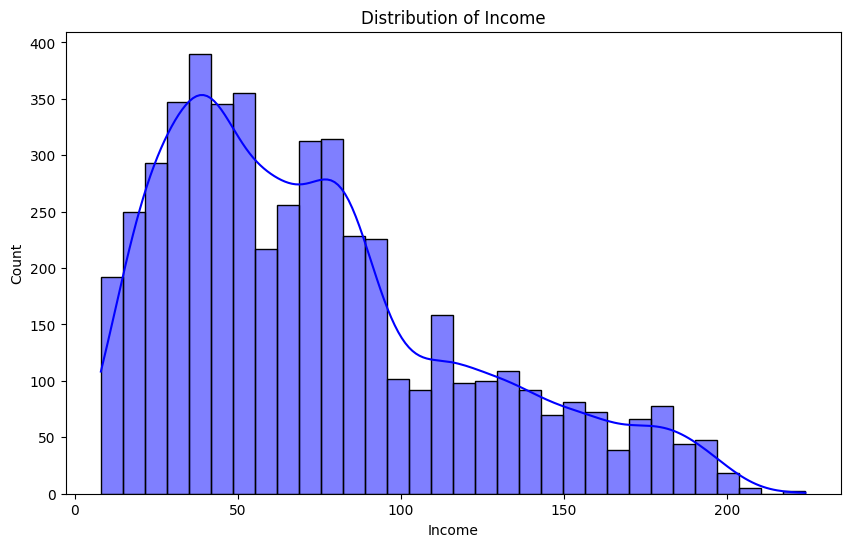

Column: ZIP Code, Normality Test p-value: 0.0
ZIP Code do not follow Gaussian distribution


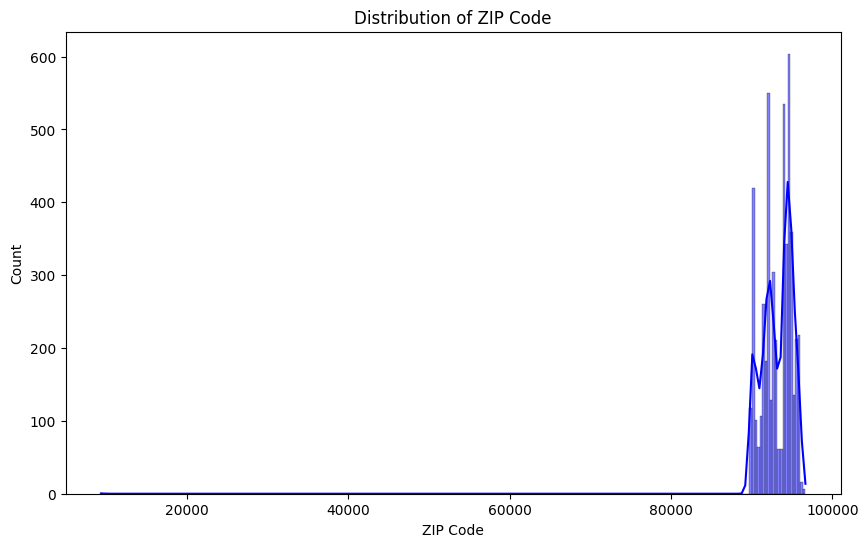

Column: Family, Normality Test p-value: 0.0
Family do not follow Gaussian distribution


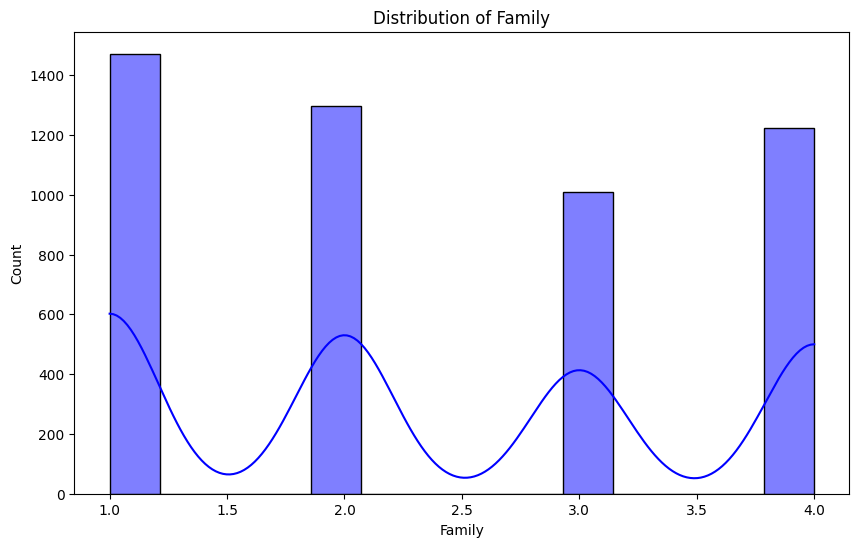

Column: CCAvg, Normality Test p-value: 0.0
CCAvg do not follow Gaussian distribution


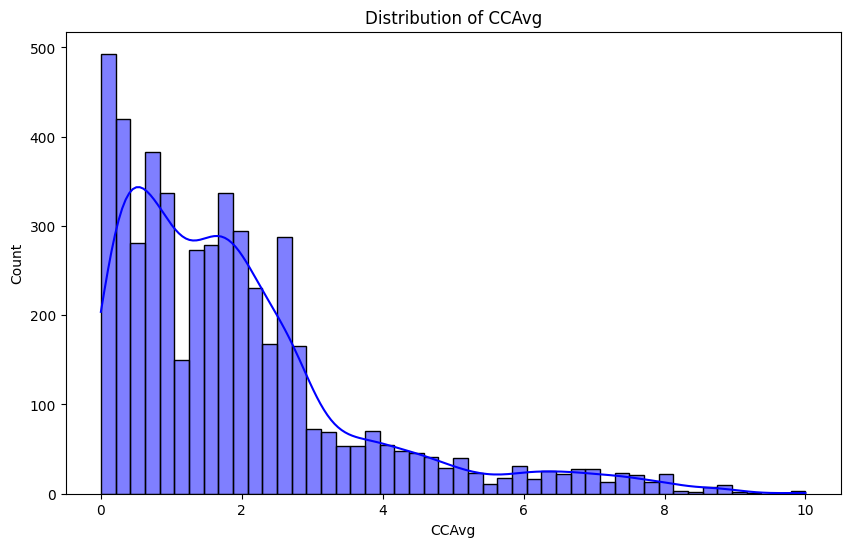

Column: Education, Normality Test p-value: 0.0
Education do not follow Gaussian distribution


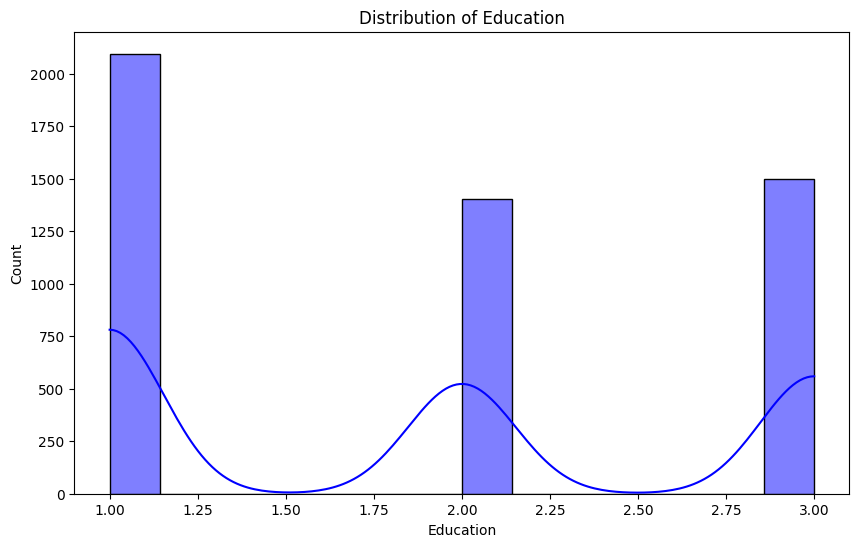

Column: Mortgage, Normality Test p-value: 0.0
Mortgage do not follow Gaussian distribution


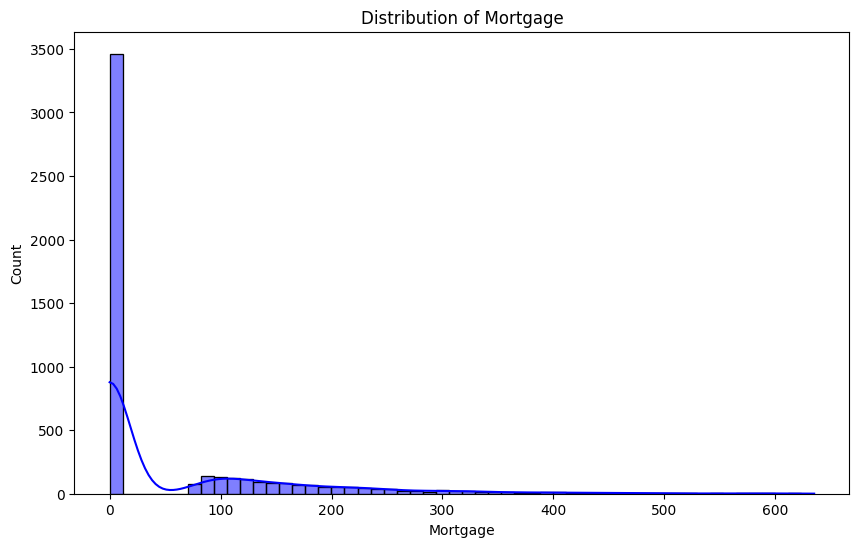

Column: CreditCard, Normality Test p-value: 0.0
CreditCard do not follow Gaussian distribution


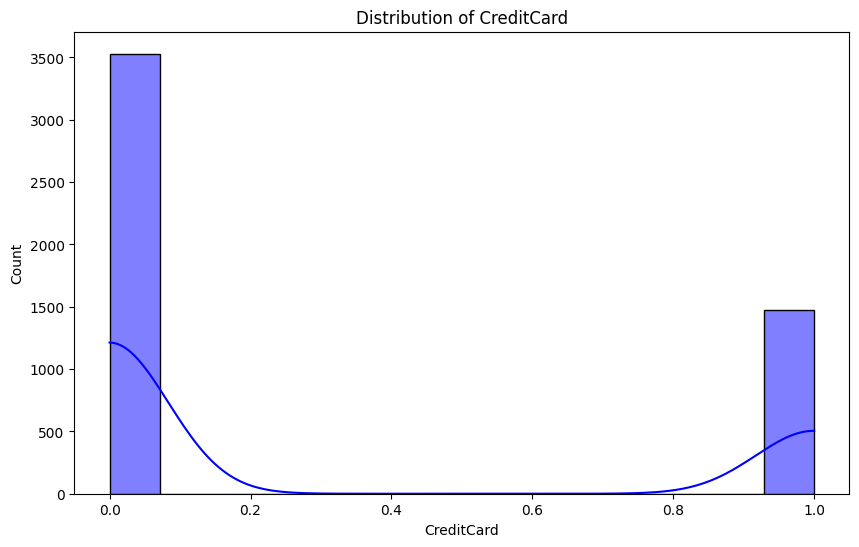

Column: Securities Account, Normality Test p-value: 0.0
Securities Account do not follow Gaussian distribution


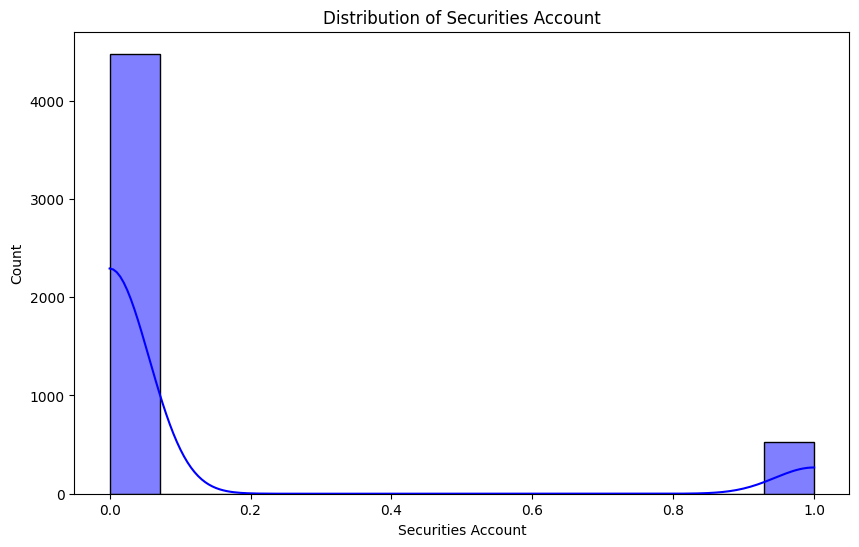

Column: CD Account, Normality Test p-value: 0.0
CD Account do not follow Gaussian distribution


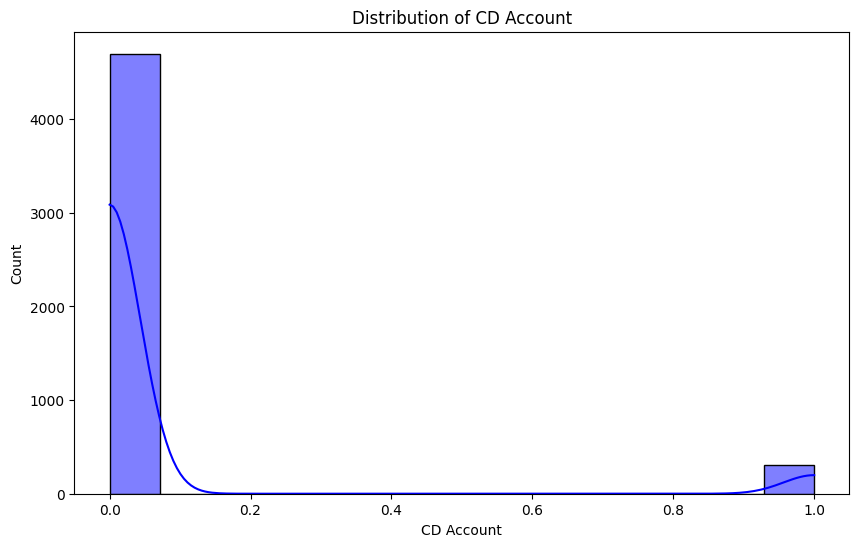

Column: Online, Normality Test p-value: 0.0
Online do not follow Gaussian distribution


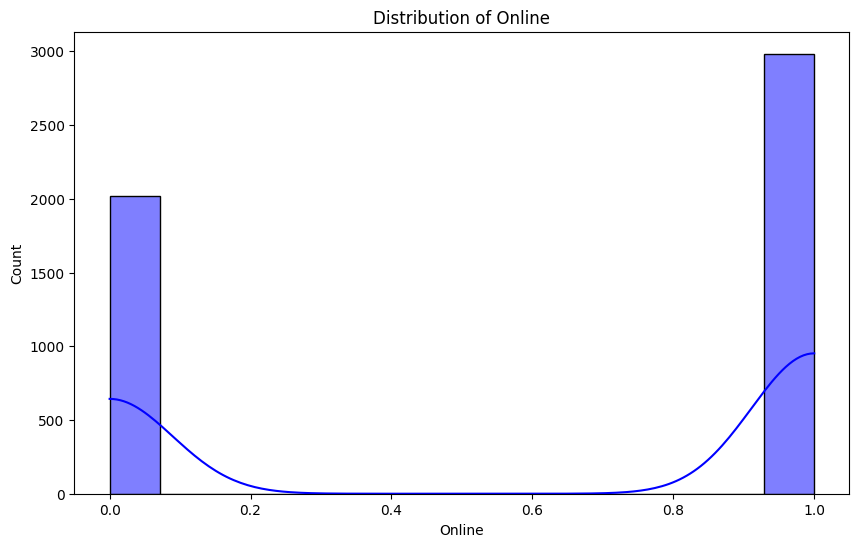

Column: Personal Loan, Normality Test p-value: 0.0
Personal Loan do not follow Gaussian distribution


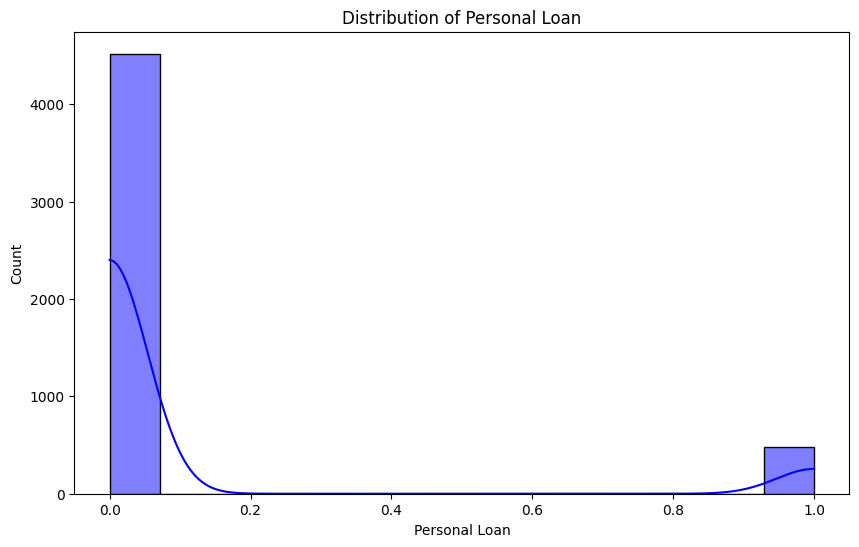

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest
# check whether each variable follows a Gaussian distribution and visualize it
for column in df.columns:
    # perform a normality test
    stat, p_value = normaltest(df[column])
    print(f'Column: {column}, Normality Test p-value: {p_value}')
    if p_value > 0.05:
        print(f'{column} may follow Gaussian distribution')
    else:
        print(f'{column} do not follow Gaussian distribution')

    # visual distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, color='blue')
    plt.title(f'Distribution of {column}')
    plt.show()

In [6]:
# save the data as csv file
df.to_csv("Loan.csv", index=False)